# 경사 하강법
- 학습률 learning rate
- 

In [ ]:
y_pred = a * x_data + b
error = y_data - y_pred

# MSE를 a로 편미분
a_diff = -(2 / len(x_data)) * sum(x_data * error)
# MSE를 b로 편미분
b_diff = -(2 / len(x_data)) * sum(error)

# update a
a = a - lr * a_diff

# update b
b = b - lr * b_diff

epoch = 0.0000, 기울기 = 27.8400, 절편 = 5.4300
epoch = 100.0000, 기울기 = 7.0739, 절편 = 50.5117
epoch = 200.0000, 기울기 = 4.0960, 절편 = 68.2822
epoch = 300.0000, 기울기 = 2.9757, 절편 = 74.9678
epoch = 400.0000, 기울기 = 2.5542, 절편 = 77.4830
epoch = 500.0000, 기울기 = 2.3956, 절편 = 78.4293
epoch = 600.0000, 기울기 = 2.3360, 절편 = 78.7853
epoch = 700.0000, 기울기 = 2.3135, 절편 = 78.9192
epoch = 800.0000, 기울기 = 2.3051, 절편 = 78.9696
epoch = 900.0000, 기울기 = 2.3019, 절편 = 78.9886
epoch = 1000.0000, 기울기 = 2.3007, 절편 = 78.9957
epoch = 1100.0000, 기울기 = 2.3003, 절편 = 78.9984
epoch = 1200.0000, 기울기 = 2.3001, 절편 = 78.9994
epoch = 1300.0000, 기울기 = 2.3000, 절편 = 78.9998
epoch = 1400.0000, 기울기 = 2.3000, 절편 = 78.9999
epoch = 1500.0000, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1600.0000, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1700.0000, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1800.0000, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1900.0000, 기울기 = 2.3000, 절편 = 79.0000
epoch = 2000.0000, 기울기 = 2.3000, 절편 = 79.0000


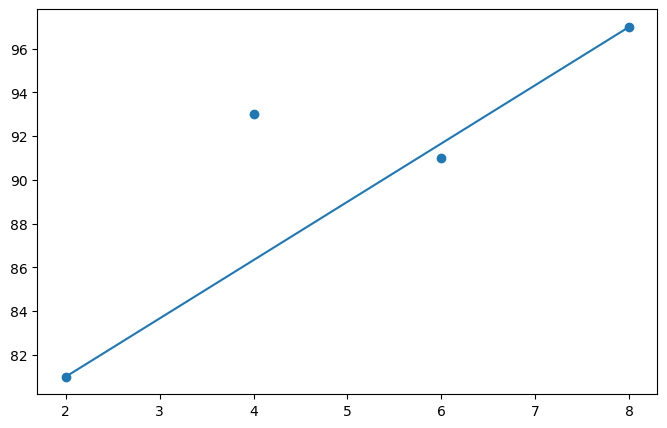

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]



x_data = np.array(x)
y_data = np.array(y)

a = 0
b = 0

lr = 0.03


epochs = 2001

for i in range(epochs):
    y_pred = a * x_data + b
    error = y_data - y_pred

    # MSE를 a로 편미분
    a_diff = -(2 / len(x_data)) * sum(x_data * error)
    # MSE를 b로 편미분
    b_diff = -(2 / len(x_data)) * sum(error)

    # update a
    a = a - lr * a_diff
    # update b
    b = b - lr * b_diff

    if i % 100 == 0:
        print("epoch = {:.4f}, 기울기 = {:.4f}, 절편 = {:.4f}".format(i, a, b))

y_pred = a * x_data + b
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_data), max(y_data)])
plt.show()

# 다중 선형 회귀
- 여러가지 요소로 변하는 값 예측하기

/var/folders/dv/dr6sg3sn6h16c2xkmjp_82bh0000gn/T/ipykernel_75937/1534029209.py:16: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


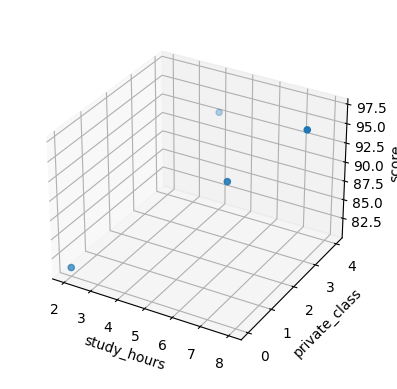

NameError: name 'x_data' is not defined

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('score')
ax.dist = 11
ax.scatter(x1, x2, y)
plt.show()

x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

a1 = 0
a2 = 0
b = 0

lr = 0.02

epochs = 2001

def returnDiff(x):
    return -(2 / len(x1_data)) * sum(x)
def update_lr(x, x_diff):
    x = x - lr * x_diff
    

for i in range(epochs):
    y_pred = a1 * x1_data + a2 * x2_data + b
    error = y_data - y_pred

    # MSE를 편미분
    a1_diff = returnDiff(x1_data * error)
    a2_diff = returnDiff(x2_data * error)
    b_diff = returnDiff(y_data - y_pred)

    # update 
    update_lr(a1, a1_diff)
    update_lr(a2, a2_diff)
    update_lr(b, b_diff)

    if i % 100 == 0:
        print("epoch = {:.4f}, 기울기1 = {:.4f}, 기울기2 = {:.4f}, 절편 = {:.4f}".format(i, a1, a2, b))


In [1]:
#참고 자료, 다중 선형회귀 '예측 평면' 3D로 보기

import statsmodels.api as statm
import statsmodels.formula.api as statfa
from matplotlib.pyplot import figure

X = [i[0:2] for i in data] # attribute
y = [i[2] for i in data] # class

X_1=statm.add_constant(X)
results=statm.OLS(y,X_1).fit()

hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)

fig = plt.figure()
graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study hours')
graph.set_ylabel('private class')
graph.set_zlabel('Score')
graph.dist = 11

plt.show()

NameError: name 'data' is not defined